In [2]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop
import requests
from PIL import Image
from io import BytesIO

In [3]:
# --- 1 & 2. SETUP PATHS AND CONSTANTS ---

base_dir = "C:/Users/Vikra/Desktop/DLAssignment/archive (1)"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

NUM_CLASSES = 100
TARGET_SIZE = (224, 224) 

print("✅ Paths are set.")
print(f"Base Directory: {base_dir}")

✅ Paths are set.
Base Directory: C:/Users/Vikra/Desktop/DLAssignment/archive (1)


In [4]:
# --- 3. MODEL ARCHITECTURE FOR MULTI-CLASS CLASSIFICATION ---
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(TARGET_SIZE[0], TARGET_SIZE[1], 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

c:\Users\Vikra\Desktop\DLAssignment\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# --- 4. COMPILE THE MODEL ---
model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        51,300 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,729,828 (37.12 MB)

 Trainable params: 9,729,828 (37.12 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# --- 5. DATA PREPROCESSING AND AUGMENTATION ---
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=TARGET_SIZE)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=32,
                                                              class_mode='categorical',
                                                              target_size=TARGET_SIZE)

Found 12594 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [7]:
# --- 6. TRAIN THE MODEL ---
history = model.fit(
          train_generator,
          epochs=8, 
          validation_data=validation_generator,
          verbose=1)

c:\Users\Vikra\Desktop\DLAssignment\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 0s 773ms/step - accuracy: 0.0262 - loss: 4.4973

c:\Users\Vikra\Desktop\DLAssignment\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


394/394 ━━━━━━━━━━━━━━━━━━━━ 313s 793ms/step - accuracy: 0.0472 - loss: 4.3030 - val_accuracy: 0.1320 - val_loss: 3.5962
Epoch 2/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 359s 911ms/step - accuracy: 0.1386 - loss: 3.5824 - val_accuracy: 0.2620 - val_loss: 2.9857
Epoch 3/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 306s 777ms/step - accuracy: 0.2152 - loss: 3.1298 - val_accuracy: 0.3420 - val_loss: 2.5567
Epoch 4/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 218s 551ms/step - accuracy: 0.2936 - loss: 2.7752 - val_accuracy: 0.4280 - val_loss: 2.1972
Epoch 5/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 210s 533ms/step - accuracy: 0.3506 - loss: 2.5254 - val_accuracy: 0.5000 - val_loss: 1.8690
Epoch 6/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 275s 699ms/step - accuracy: 0.3883 - loss: 2.3596 - val_accuracy: 0.5440 - val_loss: 1.7611
Epoch 7/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 279s 707ms/step - accuracy: 0.4162 - loss: 2.2255 - val_accuracy: 0.5740 - val_loss: 1.6800
Epoch 8/8
394/394 ━━━━━━━━━━━━━━━━━━━━ 276s 701ms/step - accuracy: 0.4430 - loss: 2.0882 - va

In [8]:
# after training is finished
model.save(r"C:/Users/Vikra/Desktop/DLAssignment/archive (1)/model.h5")   # or saved_model format
import json
with open(r"C:/Users/Vikra/Desktop/DLAssignment/archive (1)/class_indices.json","w") as f:
    json.dump(train_generator.class_indices, f)


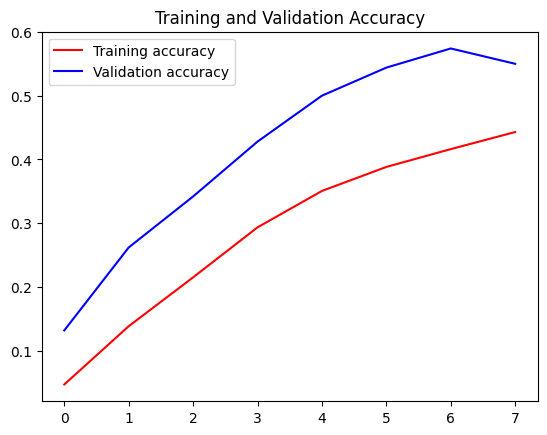

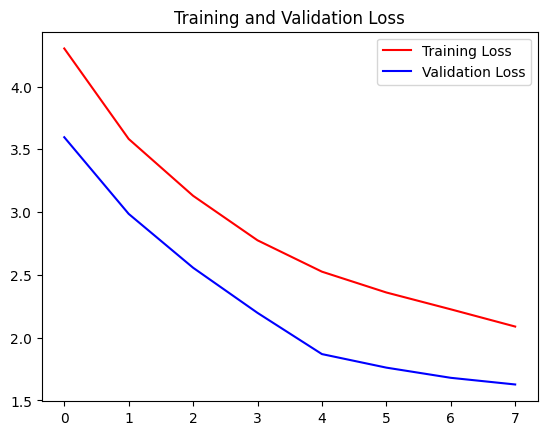

In [9]:
# --- 7. PLOT TRAINING HISTORY ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

Predicting for: C:\Users\Vikra\Desktop\DLAssignment\archive (1)\test\ADONIS\3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


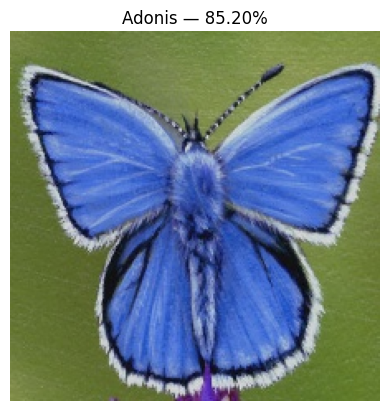


Predicting for: C:\Users\Vikra\Desktop\DLAssignment\archive (1)\test\CRIMSON PATCH\4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


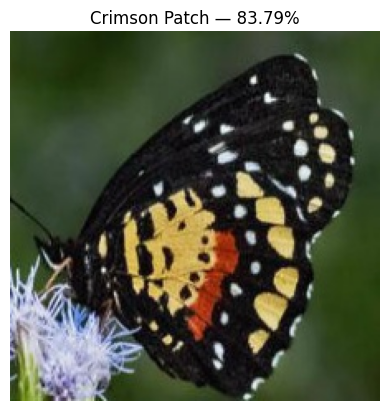

In [14]:
from pathlib import Path
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
import json, os

# CONFIG: update to your test folder (use raw string or forward slashes)
TEST_FOLDER = Path(r"C:/Users/Vikra/Desktop/DLAssignment/archive (1)/test")

# Optionally a saved model file you created earlier (update filename if you used different name)
SAVED_MODEL_PATH = Path(r"C:/Users/Vikra/Desktop/DLAssignment/archive (1)/model.h5")
# Optionally a saved class-index json (if you saved it)
CLASS_INDEX_JSON = Path(r"C:/Users/Vikra/Desktop/DLAssignment/archive (1)/class_indices.json")

TARGET_SIZE = (224, 224)  # keep consistent with training

# 1) Ensure there's a model object in memory or try to load one
if "model" not in globals():
    if SAVED_MODEL_PATH.exists():
        print("Loading saved model from", SAVED_MODEL_PATH)
        model = tf.keras.models.load_model(str(SAVED_MODEL_PATH))
    else:
        raise RuntimeError("No `model` found in kernel and no saved model at: " + str(SAVED_MODEL_PATH))

# 2) Prepare class mapping
if "train_generator" in globals() and hasattr(train_generator, "class_indices"):
    class_names_map = {v:k for k,v in train_generator.class_indices.items()}
elif CLASS_INDEX_JSON.exists():
    try:
        with open(CLASS_INDEX_JSON,"r") as f:
            idx = json.load(f)
        class_names_map = {int(v):k for k,v in idx.items()}  # ensure ints
    except Exception as e:
        raise RuntimeError("Failed to load class index json: " + str(e))
else:
    raise RuntimeError("No class index mapping available. You must either run the generator cell or provide a JSON mapping.")

def predict_local_image(model, file_path: Path, class_names_map: dict):
    file_path = Path(file_path)
    if not file_path.exists():
        print("File not found:", file_path)
        return
    try:
        img = Image.open(file_path).convert("RGB")
    except Exception as e:
        print("Error opening image:", e)
        return

    img_resized = img.resize(TARGET_SIZE)
    arr = img_to_array(img_resized)
    arr = np.expand_dims(arr, axis=0) / 255.0

    preds = model.predict(arr)
    if preds.ndim == 2:
        preds = preds[0]
    pred_idx = int(np.argmax(preds))
    confidence = float(np.max(preds))
    class_name = class_names_map.get(pred_idx, f"idx_{pred_idx}")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{class_name.replace('_',' ').title()} — {confidence:.2%}")
    plt.show()

# Example usage: use folder and subfolder names safely
# Instead of writing "APPOLLO\1.jpg" use join: TEST_FOLDER / "APPOLLO" / "1.jpg"
img1 = TEST_FOLDER / "ADONIS" / "3.jpg"
img2 = TEST_FOLDER / "CRIMSON PATCH" / "4.jpg"

print("Predicting for:", img1)
predict_local_image(model, img1, class_names_map)

print("\nPredicting for:", img2)
predict_local_image(model, img2, class_names_map)
